# KELOMPOK 1

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import streamlit as st
from sklearn.decomposition import PCA
import joblib

In [22]:
df = pd.read_csv('dataset_kemiskinan.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tahun                   81 non-null     int64  
 1   kabupaten_kota          81 non-null     object 
 2   jumlah_warga_jabar      81 non-null     float64
 3   jumlah_penduduk_miskin  81 non-null     float64
 4   garis_kemiskinan        81 non-null     int64  
 5   jumlah_pengangguran     81 non-null     int64  
 6   PDRB                    81 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.6+ KB


In [24]:
df.head()

,Tahun,kabupaten_kota,jumlah_warga_jabar,jumlah_penduduk_miskin,garis_kemiskinan,jumlah_pengangguran,PDRB
0,2017,Bogor,5715.01,487.28,337550,248368,35152.64
1,2017,Sukabumi,2453.50,197.12,284603,86014,22825.17
2,2017,Cianjur,2256.59,257.41,320390,95100,17094.39
3,2017,Bandung,3657.60,268.02,310569,64673,28123.79
4,2017,Garut,2588.84,291.24,267252,89111,18552.38


## Exploratory Data Analysis

## Line Plot

In [25]:
# --- LINE PLOTS ---
# Prepare data: Sum/Mean per year
annual_stats = df.groupby('Tahun').agg({
    'jumlah_penduduk_miskin': 'sum',
    'garis_kemiskinan': 'mean'
}).reset_index()

([<matplotlib.axis.XTick at 0x1aeb9c02710>,
 [Text(2017, 0, '2017'), Text(2018, 0, '2018'), Text(2019, 0, '2019')])

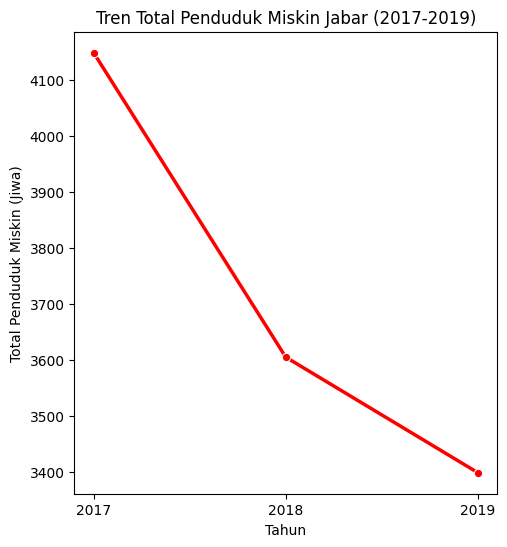

In [26]:
# Line Plot 1: Total Poverty Trend
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=annual_stats, x='Tahun', y='jumlah_penduduk_miskin', marker='o', color='red', linewidth=2.5)
plt.title('Tren Total Penduduk Miskin Jabar (2017-2019)')
plt.ylabel('Total Penduduk Miskin (Jiwa)')
plt.xticks(annual_stats['Tahun'])

([<matplotlib.axis.XTick at 0x1aebb72a990>,
 [Text(2017, 0, '2017'), Text(2018, 0, '2018'), Text(2019, 0, '2019')])

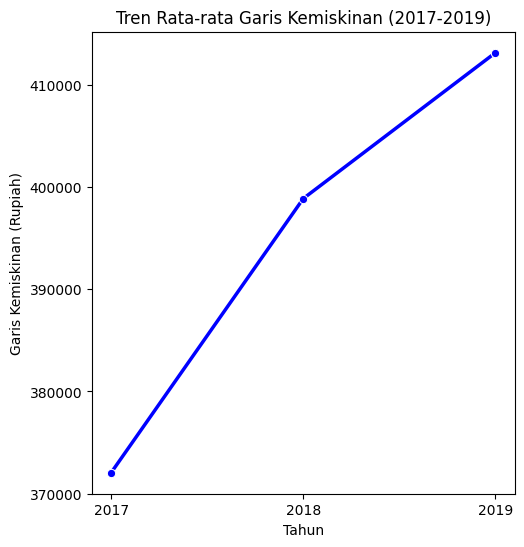

In [27]:
# Line Plot 2: Poverty Line Trend
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.lineplot(data=annual_stats, x='Tahun', y='garis_kemiskinan', marker='o', color='blue', linewidth=2.5)
plt.title('Tren Rata-rata Garis Kemiskinan (2017-2019)')
plt.ylabel('Garis Kemiskinan (Rupiah)')
plt.xticks(annual_stats['Tahun'])

## Box Plot

Text(0, 0.5, 'Jumlah Penduduk Miskin (Jiwa)')

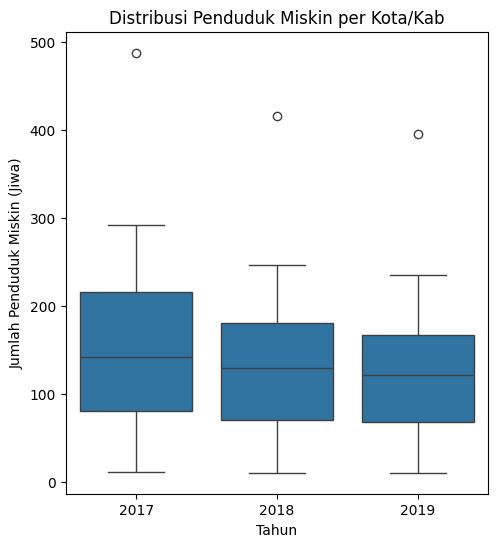

In [28]:
# Box Plot 1: Distribution of Poverty
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Tahun', y='jumlah_penduduk_miskin')
plt.title('Distribusi Penduduk Miskin per Kota/Kab')
plt.ylabel('Jumlah Penduduk Miskin (Jiwa)')

Text(0, 0.5, 'Jumlah Pengangguran (Jiwa)')

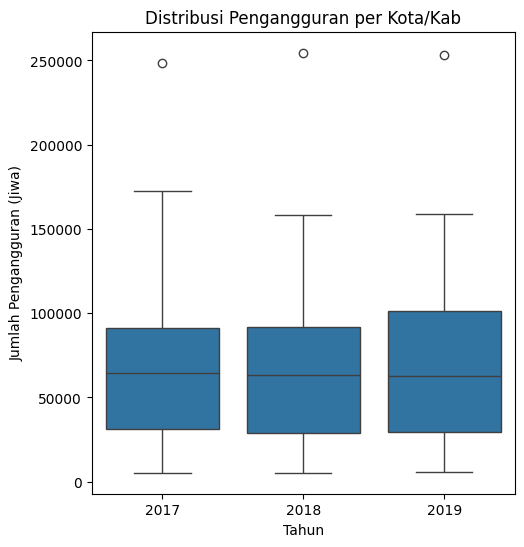

In [29]:
# Box Plot 2: Distribution of Unemployment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Tahun', y='jumlah_pengangguran')
plt.title('Distribusi Pengangguran per Kota/Kab')
plt.ylabel('Jumlah Pengangguran (Jiwa)')

## Pie Chart

In [30]:
# Filter data for 2019
df_2019 = df[df['Tahun'] == 2019].copy()

Text(0.5, 1.0, '5 Daerah dengan Ekonomi (PDRB) Terbesar (2019)')

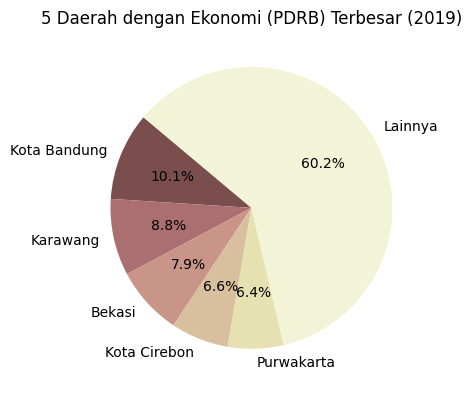

In [31]:
# --- PIE 1: SIAPA PENGUASA EKONOMI (PDRB)? ---
# Ambil 5 Daerah dengan PDRB Terbesar
plt.figure(figsize=(10, 8))
top5_pdrb = df_2019.nlargest(5, 'PDRB')
sisa_pdrb = df_2019['PDRB'].sum() - top5_pdrb['PDRB'].sum()
data_pie_pdrb = pd.concat([top5_pdrb, pd.DataFrame({'kabupaten_kota': ['Lainnya'], 'PDRB': [sisa_pdrb]})])

plt.subplot(1, 2, 1)
plt.pie(data_pie_pdrb['PDRB'], labels=data_pie_pdrb['kabupaten_kota'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pink'))
plt.title('5 Daerah dengan Ekonomi (PDRB) Terbesar (2019)', fontsize=12)

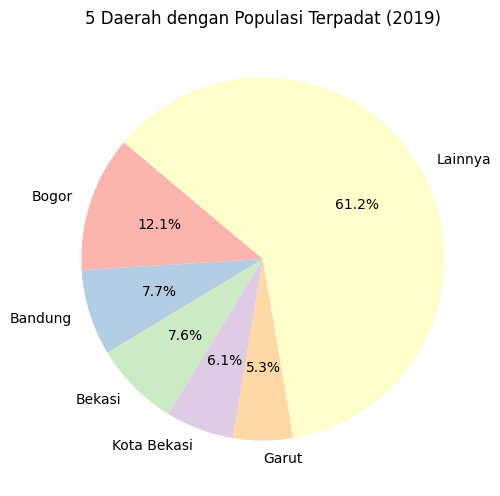

In [32]:
# --- PIE 2: SIAPA YANG PALING PADAT (POPULASI)? ---
# Ambil 5 Daerah dengan Penduduk Terbanyak
plt.figure(figsize=(10, 8))
top5_warga = df_2019.nlargest(5, 'jumlah_warga_jabar')
sisa_warga = df_2019['jumlah_warga_jabar'].sum() - top5_warga['jumlah_warga_jabar'].sum()
data_pie_warga = pd.concat([top5_warga, pd.DataFrame({'kabupaten_kota': ['Lainnya'], 'jumlah_warga_jabar': [sisa_warga]})])

plt.subplot(1, 2, 2)
# Gunakan warna 'Pastel' untuk populasi
plt.pie(data_pie_warga['jumlah_warga_jabar'], labels=data_pie_warga['kabupaten_kota'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
plt.title('5 Daerah dengan Populasi Terpadat (2019)', fontsize=12)

plt.tight_layout()
plt.show()

## Scatter Plot

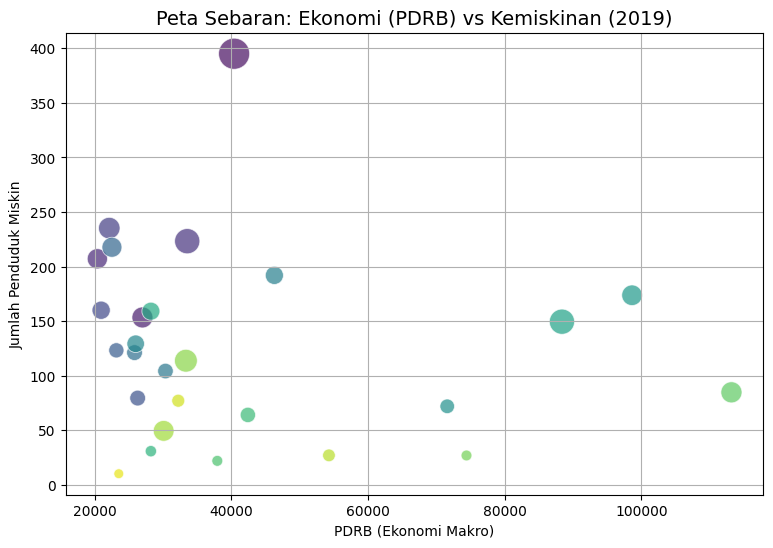

In [33]:
# Scatter Plot
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df_2019, x='PDRB', y='jumlah_penduduk_miskin', hue='kabupaten_kota', size='jumlah_warga_jabar', sizes=(50, 500), legend=False, palette='viridis', alpha=0.7)
plt.title('Peta Sebaran: Ekonomi (PDRB) vs Kemiskinan (2019)', fontsize=14)
plt.xlabel('PDRB (Ekonomi Makro)')
plt.ylabel('Jumlah Penduduk Miskin')
plt.grid(True)
plt.show()

## Correlation Matrix

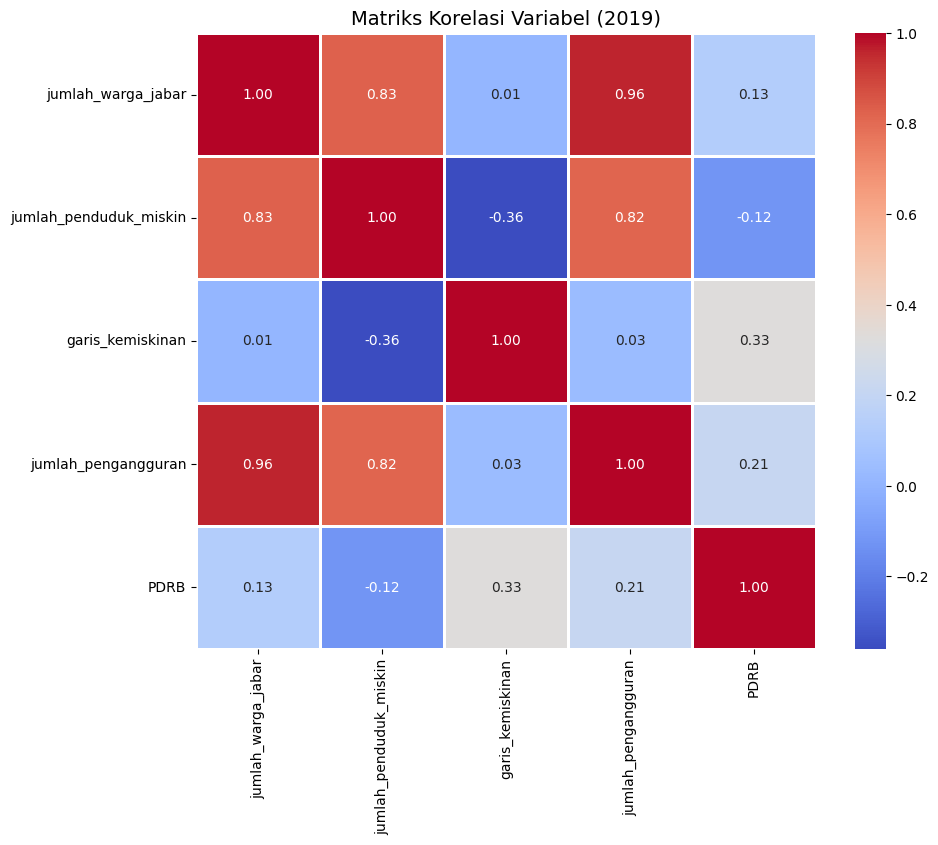

In [34]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
kolom_korelasi = ['jumlah_warga_jabar', 'jumlah_penduduk_miskin', 'garis_kemiskinan', 'jumlah_pengangguran', 'PDRB']
matriks_korelasi = df_2019[kolom_korelasi].corr()
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Matriks Korelasi Variabel (2019)', fontsize=14)
plt.show()

In [35]:
features = [
    'jumlah_warga_jabar',
    'jumlah_penduduk_miskin',
    'garis_kemiskinan',   
    'jumlah_pengangguran',
    'PDRB'                      
]
X = df[features]

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [39]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

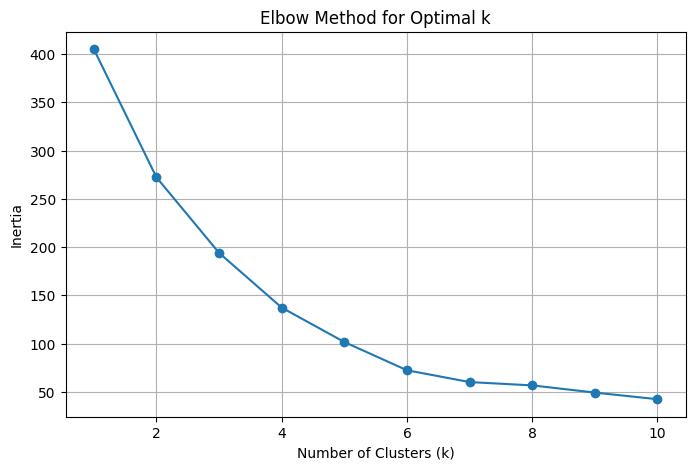

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

In [41]:
optimal_k = 3  # Berdasarkan elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [42]:
df['Cluster'] = kmeans.labels_
df.to_csv('datasetkemiskinan_final.csv', index=False)

In [43]:
sil_score = silhouette_score(scaled_features, kmeans.labels_)

print("Silhouette Score:", sil_score)

Silhouette Score: 0.35641332448432644


In [44]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [45]:
colors = ['blue', 'green', 'red', 'purple']

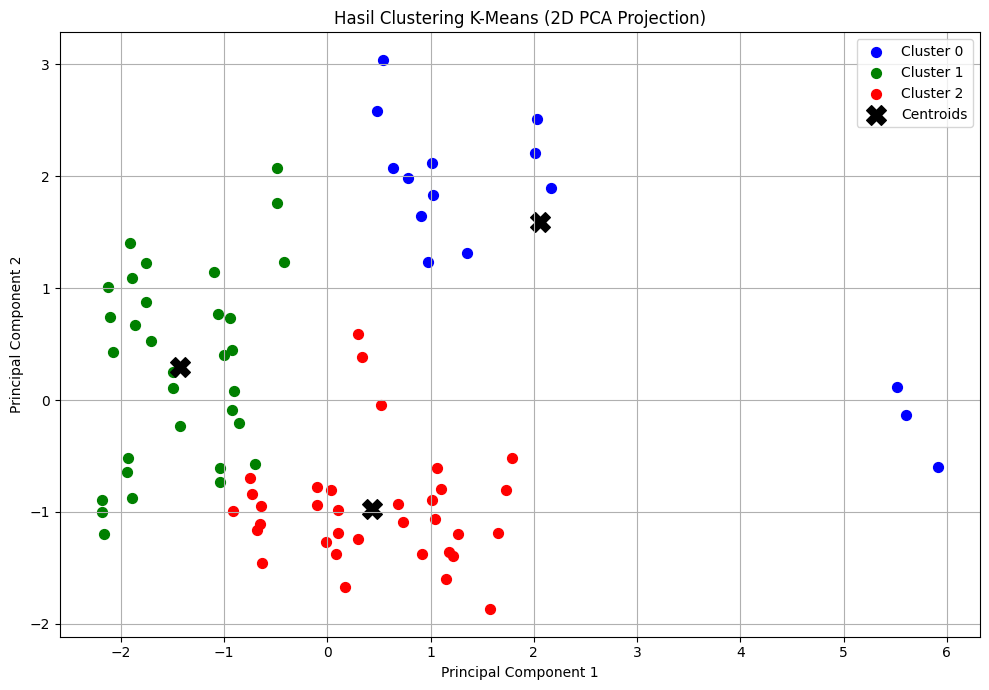

In [46]:
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_points = reduced_features[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0],
                cluster_points[:, 1],
                s=50,
                label=f'Cluster {cluster}',
                color=colors[cluster])

centroids_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_reduced[:, 0],
            centroids_reduced[:, 1],
            s=200,
            c='black',
            marker='X',
            label='Centroids')

plt.title("Hasil Clustering K-Means (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(
    {
        "model": kmeans,
        "scaler": scaler
    },
    "kmeans.pkl"
)

['kmeans.pkl']

In [ ]:

joblib.dump(kmeans, "model.pkl")

['model.pkl']